#  Supervised Machine Learning

### About Dataset

* Age- Age Of The Customer
* Employment Type- The Sector In Which Customer Is Employed
* GraduateOrNot- Whether The Customer Is College Graduate Or Not
* AnnualIncome- The Yearly Income Of The Customer In Indian Rupees[Rounded To Nearest 50 Thousand Rupees]
* FamilyMembers- Number Of Members In Customer's Family
* ChronicDisease- Whether The Customer Suffers From Any Major Disease Or Conditions Like Diabetes/High BP or Asthama,etc.
* FrequentFlyer- Derived Data Based On Customer's History Of Booking Air Tickets On Atleast 4 Different Instances In The Last 2 Years[2017-2019].
* EverTravelledAbroad- Has The Customer Ever Travelled To A Foreign Country[Not Necessarily Using The Company's Services]
* TravelInsurance- Did The Customer Buy Travel Insurance Package During Introductory Offering Held In The Year 2019.

### Import Libraries 

In [358]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score

from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

### Load Data 

In [359]:
df = pd.read_csv('TravelInsurancePrediction.csv')

In [360]:
df

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...
1982,1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


### General Information & Missing Values

In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [362]:
df.isnull().sum()

Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [363]:
df.isna().sum() * 100 / len(df)

Unnamed: 0             0.0
Age                    0.0
Employment Type        0.0
GraduateOrNot          0.0
AnnualIncome           0.0
FamilyMembers          0.0
ChronicDiseases        0.0
FrequentFlyer          0.0
EverTravelledAbroad    0.0
TravelInsurance        0.0
dtype: float64

Tidak ada missing values

### Categorical Column Transformation

In [364]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
col=['Employment Type','GraduateOrNot','FrequentFlyer','EverTravelledAbroad']
df[col]=df[col].apply(le.fit_transform)
df.head(n=5)

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,0,1,400000,6,1,0,0,0
1,1,31,1,1,1250000,7,0,0,0,0
2,2,34,1,1,500000,4,1,0,0,1
3,3,28,1,1,700000,3,1,0,0,0
4,4,28,1,1,700000,8,1,1,0,0


In [365]:
df.duplicated().sum()

0

Tidak ada duplikat data

In [366]:
#Unnamed: 0 hanyalah indeks untuk kolom. Drop kolom tersebut
df.drop(columns=['Unnamed: 0'],inplace=True)
df

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,0,1,400000,6,1,0,0,0
1,31,1,1,1250000,7,0,0,0,0
2,34,1,1,500000,4,1,0,0,1
3,28,1,1,700000,3,1,0,0,0
4,28,1,1,700000,8,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1982,33,1,1,1500000,4,0,1,1,1
1983,28,1,1,1750000,5,1,0,1,0
1984,28,1,1,1150000,6,1,0,0,0
1985,34,1,1,1000000,6,0,1,1,1


In [367]:
df.describe()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
count,1987.000000,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000
mean,29.650226,0.713135,0.851535,9.327630e+05,4.752894,0.277806,0.209864,0.191243,0.357323
std,2.913308,0.452412,0.355650,3.768557e+05,1.609650,0.448030,0.407314,0.393379,0.479332
min,25.000000,0.000000,0.000000,3.000000e+05,2.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,0.000000,1.000000,6.000000e+05,4.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,1.000000,1.000000,9.000000e+05,5.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,1.000000,1.000000,1.250000e+06,6.000000,1.000000,0.000000,0.000000,1.000000
max,35.000000,1.000000,1.000000,1.800000e+06,9.000000,1.000000,1.000000,1.000000,1.000000


In [368]:
df.dtypes

Age                    int64
Employment Type        int32
GraduateOrNot          int32
AnnualIncome           int64
FamilyMembers          int64
ChronicDiseases        int64
FrequentFlyer          int32
EverTravelledAbroad    int32
TravelInsurance        int64
dtype: object

Done! Semua sudah jadi angka.

In [369]:
df['TravelInsurance'].value_counts()

0    1277
1     710
Name: TravelInsurance, dtype: int64

Terlihat bahwa data imbalanced pada kolom target variablenya.

### Dataset Splitting

Pecah data menjadi 2 bagian:

* Data training
* Data testing

In [370]:
from sklearn.model_selection import train_test_split

In [371]:
df_train, df_test = train_test_split(df, 
                                     test_size = 0.25, random_state = 1) 

In [372]:
x_train_data = df_train.loc[:, df_train.columns!='TravelInsurance']
y_train_data = df_train.loc[:, df_train.columns=='TravelInsurance']

x_test_data = df_test.loc[:, df_test.columns!='TravelInsurance']
y_test_data = df_test.loc[:, df_test.columns=='TravelInsurance']

### Random Forest 

In [373]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [374]:
def evaluate(model, x_test = x_test_data, y_test = y_test_data):
    y_pred = model.predict(x_test)    
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('------')
    print('Confusion Matrix:')
    print()
    print(classification_report(y_test, y_pred))
    print('------')
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print('Assuming 1 as positive, we get:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)
    
    print('')
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-Score:', 2 * (precision * recall)/(precision + recall))
    

In [375]:
base_model = RandomForestClassifier(random_state = 1, n_jobs = -1)
base_model.fit(x_train_data, y_train_data)
evaluate(base_model)

Accuracy: 0.8108651911468813
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       317
           1       0.78      0.67      0.72       180

    accuracy                           0.81       497
   macro avg       0.80      0.78      0.79       497
weighted avg       0.81      0.81      0.81       497

------
Assuming 1 as positive, we get:

True Positive: 120
True Negative: 283
False Positive: 34
False Negative: 60

Precision: 0.7792207792207793
Recall: 0.6666666666666666
F1-Score: 0.7185628742514969


Meskipun model di atas memiliki akurasi yang bagus, ini karena data yang tidak seimbang. Karena '1' adalah 'positif', maka presisi, recall, dan f1-score model ini buruk karena model ini tidak dapat memprediksi nilai positif dengan baik.

### ROC-AUC Understanding¶ 

Selain precision, recall, f1 juga ada metric lain yaitu ROC-AUC.

In [376]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score

In [377]:
def evaluate(model, x_test = x_test_data, y_test = y_test_data):
    y_pred = model.predict(x_test)    
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('------')
    print('Confusion Matrix:')
    print()
    print(classification_report(y_test, y_pred))
    print('------')
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print('Assuming 1 as positive, we get:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)
    
    print('')
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-Score:', 2 * (precision * recall)/(precision + recall))
    print('-----')
    print('ROC AUC')
    
    plot_roc_curve(model, x_test, y_test)
    print('Area under Curve of the ROC:', roc_auc_score(y_test,
                                                       model.predict_proba(x_test)[:,1]))

Accuracy: 0.8108651911468813
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       317
           1       0.78      0.67      0.72       180

    accuracy                           0.81       497
   macro avg       0.80      0.78      0.79       497
weighted avg       0.81      0.81      0.81       497

------
Assuming 1 as positive, we get:

True Positive: 120
True Negative: 283
False Positive: 34
False Negative: 60

Precision: 0.7792207792207793
Recall: 0.6666666666666666
F1-Score: 0.7185628742514969
-----
ROC AUC
Area under Curve of the ROC: 0.8291009463722399


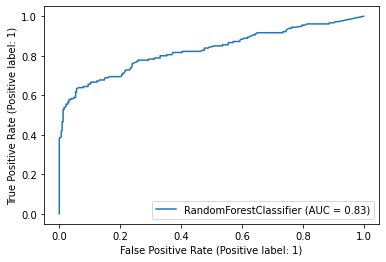

In [378]:
base_model = RandomForestClassifier(random_state = 1, n_jobs = -1)
base_model.fit(x_train_data, y_train_data)
evaluate(base_model, x_test_data, y_test_data)

### Undersampling 

In [379]:
# import random undersampling library 
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# summarize class distribution
print(Counter(y_train_data['TravelInsurance']))

# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
x_train_under, y_train_under = undersample.fit_resample(x_train_data, 
                                                        y_train_data)

# summarize class distribution
print(Counter(y_train_under['TravelInsurance']))

Counter({0: 960, 1: 530})
Counter({0: 530, 1: 530})


In [380]:
x_train_under

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
0,28,1,1,1250000,7,0,0,0
1,34,0,1,1300000,2,0,0,0
2,31,0,0,300000,4,0,0,0
3,28,1,1,1250000,5,0,1,0
4,25,1,0,1150000,5,1,0,0
...,...,...,...,...,...,...,...,...
1055,29,1,1,350000,8,1,0,0
1056,28,1,1,1450000,4,0,1,1
1057,29,1,1,1050000,4,0,0,0
1058,26,1,1,500000,5,1,0,0


Accuracy: 0.7565392354124748
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.85      0.76      0.80       317
           1       0.64      0.76      0.69       180

    accuracy                           0.76       497
   macro avg       0.74      0.76      0.75       497
weighted avg       0.77      0.76      0.76       497

------
Assuming 1 as positive, we get:

True Positive: 136
True Negative: 240
False Positive: 77
False Negative: 44

Precision: 0.6384976525821596
Recall: 0.7555555555555555
F1-Score: 0.6921119592875319
-----
ROC AUC
Area under Curve of the ROC: 0.8242989835261129


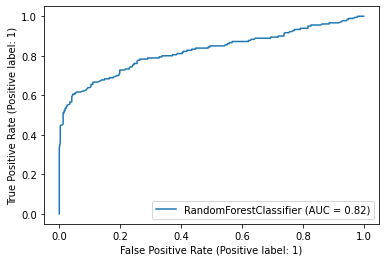

In [403]:
under_model = RandomForestClassifier(random_state = 1, n_jobs = -1)
under_model.fit(x_train_under, y_train_under)
evaluate(under_model, x_test_data, y_test_data)

Model di atas meningkat pada Recall

Recall yang tinggi berarti: di antara data-data yang sebenarnya positif, 75.56% dari data-data tersebut diprediksi sebagai positif (correctly predicts positive data). Tapi, precisionnya rendah.

### Oversampling

In [382]:
# import random oversampling library 
from collections import Counter
from imblearn.over_sampling import SMOTE
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# summarize class distribution
print(Counter(y_train_data['TravelInsurance']))

# define undersample strategy
SMOTE = SMOTE()

# fit and apply the transform
x_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(x_train_data, y_train_data)

# summarize class distribution
print(Counter(y_train_SMOTE['TravelInsurance']))

Counter({0: 960, 1: 530})
Counter({0: 960, 1: 960})


Accuracy: 0.7645875251509054
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       317
           1       0.67      0.68      0.68       180

    accuracy                           0.76       497
   macro avg       0.75      0.75      0.75       497
weighted avg       0.77      0.76      0.77       497

------
Assuming 1 as positive, we get:

True Positive: 123
True Negative: 257
False Positive: 60
False Negative: 57

Precision: 0.6721311475409836
Recall: 0.6833333333333333
F1-Score: 0.6776859504132232
-----
ROC AUC
Area under Curve of the ROC: 0.8118296529968454


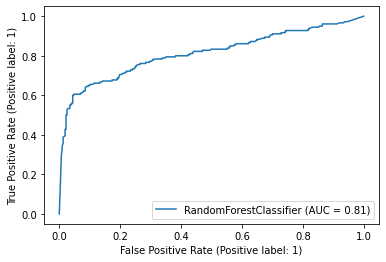

In [402]:
over_model = RandomForestClassifier(random_state = 1, n_jobs = -1)
over_model.fit(x_train_SMOTE, y_train_SMOTE)
evaluate(over_model, x_test_data, y_test_data)

Model di atas agak seimbang, memiliki Recall yang lebih tinggi daripada model dasar, presisi yang lebih tinggi daripada model undersampled, dan F1-score yang hampir sama dengan model undersampled.

### Combining Oversampling and Undersampling

Accuracy: 0.7987927565392354
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       317
           1       0.75      0.66      0.70       180

    accuracy                           0.80       497
   macro avg       0.79      0.77      0.78       497
weighted avg       0.80      0.80      0.80       497

------
Assuming 1 as positive, we get:

True Positive: 119
True Negative: 278
False Positive: 39
False Negative: 61

Precision: 0.7531645569620253
Recall: 0.6611111111111111
F1-Score: 0.7041420118343196
-----
ROC AUC
Area under Curve of the ROC: 0.8177006659656503


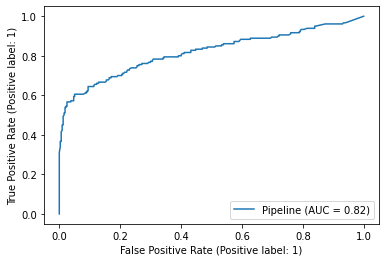

In [401]:
# import needed libraries 
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# define pipeline
combined_model = RandomForestClassifier(random_state = 1, n_jobs = -1)
over = SMOTE(sampling_strategy=0.6)
under = RandomUnderSampler(sampling_strategy=0.6)
steps = [('o', over), ('u', under), ('model', combined_model)]
pipeline = Pipeline(steps=steps)

# evaluate pipeline
pipeline.fit(x_train_data, y_train_data)
evaluate(pipeline, x_test_data, y_test_data)

Paling tinggi precision, dengan over = 0.6, under = 0.6

Accuracy: 0.7766599597585513
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       317
           1       0.68      0.71      0.70       180

    accuracy                           0.78       497
   macro avg       0.76      0.76      0.76       497
weighted avg       0.78      0.78      0.78       497

------
Assuming 1 as positive, we get:

True Positive: 128
True Negative: 258
False Positive: 59
False Negative: 52

Precision: 0.6844919786096256
Recall: 0.7111111111111111
F1-Score: 0.6975476839237057
-----
ROC AUC
Area under Curve of the ROC: 0.8243866105853488


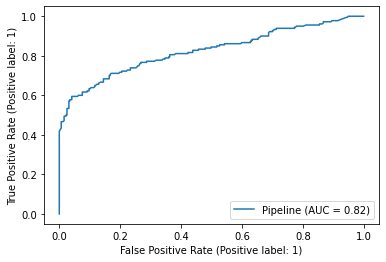

In [599]:
# import needed libraries 
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# define pipeline
combined_model = RandomForestClassifier(random_state = 1, n_jobs = -1)
over = SMOTE(sampling_strategy=0.8)
under = RandomUnderSampler(sampling_strategy=1.0)
steps = [('o', over), ('u', under), ('model', combined_model)]
pipeline = Pipeline(steps=steps)

# evaluate pipeline
pipeline.fit(x_train_data, y_train_data)
evaluate(pipeline, x_test_data, y_test_data)

Paling tinggi recall, dengan over = 0.8, under = 1.0

Accuracy: 0.7967806841046278
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       317
           1       0.73      0.70      0.71       180

    accuracy                           0.80       497
   macro avg       0.78      0.78      0.78       497
weighted avg       0.80      0.80      0.80       497

------
Assuming 1 as positive, we get:

True Positive: 126
True Negative: 270
False Positive: 47
False Negative: 54

Precision: 0.7283236994219653
Recall: 0.7
F1-Score: 0.7138810198300283
-----
ROC AUC
Area under Curve of the ROC: 0.8206011216263582


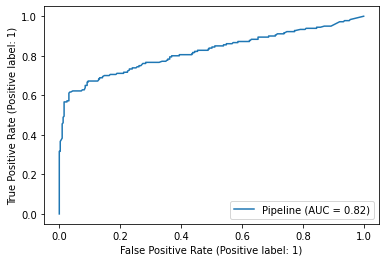

In [594]:
# import needed libraries 
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# define pipeline
combined_model = RandomForestClassifier(random_state = 1, n_jobs = -1)
over = SMOTE(sampling_strategy=0.6)
under = RandomUnderSampler(sampling_strategy=0.7)
steps = [('o', over), ('u', under), ('model', combined_model)]
pipeline = Pipeline(steps=steps)

# evaluate pipeline
pipeline.fit(x_train_data, y_train_data)
evaluate(pipeline, x_test_data, y_test_data)

Paling tinggi f1-score ambil over = 0.6, under = 0.7

In [387]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from tqdm import tqdm

import warnings
warnings.simplefilter(action='ignore')

oversampling_coef = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
undersampling_coef = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

result = {
    'over_coef':[],
    'under_coef':[],
    'acc':[],
    'prec':[],
    'recall':[],
    'f1':[]
}

for over_score in tqdm(oversampling_coef):
    for under_score in undersampling_coef:
        try:
            combined_model = RandomForestClassifier(random_state = 1, n_jobs = -1)
            over = SMOTE(sampling_strategy = over_score)
            under = RandomUnderSampler(sampling_strategy = under_score)
            steps = [('o', over), ('u', under), ('model', combined_model)]
            pipeline = Pipeline(steps = steps)

            pipeline.fit(x_train_data, y_train_data)
            y_pred = pipeline.predict(x_test_data)

            result['over_coef'].append(over_score)
            result['under_coef'].append(under_score)
            result['acc'].append(accuracy_score(y_test_data, y_pred))
            result['prec'].append(precision_score(y_test_data, y_pred))
            result['recall'].append(recall_score(y_test_data, y_pred))
            result['f1'].append(f1_score(y_test_data, y_pred))
        except:
            pass
        

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:06<00:00,  1.53it/s]


In [398]:
df_result = pd.DataFrame(result)
df_result.sort_values(['prec'],ascending=False)

,over_coef,under_coef,acc,prec,recall,f1
0,0.6,0.6,0.798793,0.763158,0.644444,0.698795
1,0.6,0.7,0.788732,0.721893,0.677778,0.699140
5,0.7,0.7,0.786720,0.720238,0.672222,0.695402
10,0.8,0.9,0.782696,0.709302,0.677778,0.693182
6,0.7,0.8,0.780684,0.707602,0.672222,0.689459
13,0.9,1.0,0.774648,0.693182,0.677778,0.685393
12,0.9,0.9,0.770624,0.687500,0.672222,0.679775
3,0.6,0.9,0.772636,0.681081,0.700000,0.690411
14,1.0,1.0,0.772636,0.681081,0.700000,0.690411
9,0.8,0.8,0.764588,0.680000,0.661111,0.670423


* paling tinggi precision, ambil over = 0.6, under = 0.6
* paling tinggi recall, ambil over = 0.8, under = 1.0
* paling tinggi f1, ambil over = 0.6, under = 0.7

## Conclusion

1. Model dengan konfigurasi yang memiliki nilai precision terbaik adalah Model Random Forest Biasa saja

2. Model dengan konfigurasi yang memiliki nilai recall terbaik adalah Model Random Forest dengan Undersampling 

3. Model dengan konfigurasi yang memiliki nilai F1-Score terbaik adalah Model Random Forest Biasa saja atau Model Random Forest dengan Oversampling dan Undersampling dengan koefisien oversampling = 0.6 dan koefisien undersampling = 0.7